In [2]:
def capacite(graphe, u, v):
    cf = graphe.edge_label(u, v)
    return int(cf.split("/")[1])

def flot(graphe, u, v):
    cf = graphe.edge_label(u, v)
    return int(cf.split("/")[0])

def changer_capacite(graphe, u, v, nouvelle_cap):
    graphe.set_edge_label(u, v, str(flot(graphe, u, v))+"/"+str(nouvelle_cap))
def changer_flot(graphe, u, v, nouveau_flot):
    graphe.set_edge_label(u, v, str(nouveau_flot)+"/"+str(capacite(graphe, u, v)))

In [3]:
import sage.graphs.graph_plot
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS['figsize'] = (3, 3)

In [4]:
def dessiner_graphe(graphe, organisation):
    for x, y, info in graphe.edges():
        c = capacite(graphe, x, y)
        f = flot(graphe, x, y)
        texte = "{}/{}".format(f, c)
        graphe.set_edge_label(x, y, texte)
    graphe.graphplot(pos = organisation, save_pos=True, edge_labels=True).show()

In [5]:
def parcours_en_largeur(graphe):
    pred = dict()
    Q = [source]
    ds = dict()
    visites = {source}
    for v in graphe.vertices():
        pred[v] = 0
        ds[v] = float("Inf")
    while len(Q) >= 1:
        x = Q.pop()
        for y in graphe.neighbors_out(x):
            c = capacite(graphe, x, y)
            f = flot(graphe, x, y)
            if y not in visites and pred[y] == 0 and f < c:
                visites.add(y)
                pred[y] = x
                dy = min(c - f, ds[x])
                ds[y] = dy
                Q.append(y)
            if puit in visites:
                return pred, ds[puit]
        for y in graphe.neighbors_in(x):
            c = capacite(graphe, y, x)
            f = flot(graphe, y, x)
            if y not in visites and pred[y] == 0 and f > 0:
                visites.add(y)
                pred[y] = x
                dy = min(f, ds[x])
                ds[y] = dy
                Q.append(y)
            if puit in visites:
                return pred, ds[puit]
    return [], 0

In [6]:
def reecriture(pred):
    chemin = []
    x = puit
    
    while x != source:
        chemin.append((pred[x],x))
        x = pred[x]
    chemin = list(reversed(chemin))
    return chemin

In [7]:
def ff(graphe, org):
    max_flot = 0
    dessiner_graphe(graphe, org)
    while True:
        chemin, delta = parcours_en_largeur(graphe)
        if chemin == []:
            break;
        chemin = reecriture(chemin)
        for u, v in chemin:
            if graphe.has_edge(u, v):
                changer_flot(graphe, u, v,  flot(graphe, u, v)+delta)
            else:
                changer_flot(graphe, v, u, flot(graphe, v, u)-delta)
        max_flot += delta
        print('flot augmente de {0} sur {1} : flot actuel {2}'.format(delta, chemin, max_flot));
        dessiner_graphe(graphe, org)
    print("Le flot maximale est {}".format(max_flot))

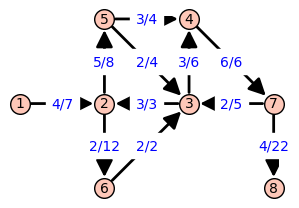

flot augmente de 2 sur [('1', '2'), ('2', '3'), ('3', '7'), ('7', '8')] : flot actuel 2


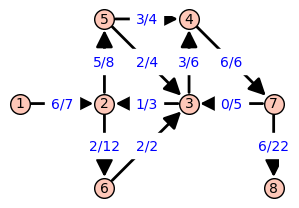

Le flot maximale est 2


In [8]:
# Exemple developpé par Adrien
latex = DiGraph()
latex.add_vertices("23456")
latex.add_vertex("1")
latex.add_vertex("7")

# flot/capacite
latex.add_edges([
    ('1', '2', "4/7"),
    ('2', '5', "5/8"),
    ('2', '6', "2/12"),
    ('6', '3', "2/2"),
    ('5', '3', "2/4"),
    ('3', '2', "3/3"),
    ('5', '4',  "3/4"),
    ('3', '4',  "3/6"),
    ('4', '7',  "6/6"),
    ('7', '3',  "2/5"),
    ('7', '8', "4/22")
])

org_latex = {
    '1': [0, 0], '2': [1, 0], '3': [2, 0], '7': [3, 0],
    '5': [1, 1], '6': [1, -1], '4': [2, 1], '8': [3, -1]
}

source = latex.sources()[0]
puit= latex.sinks()[0]

ff(latex, org_latex)



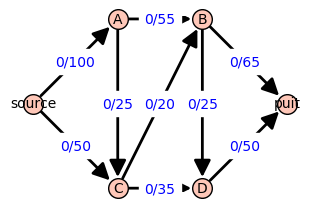

flot augmente de 35 sur [('source', 'C'), ('C', 'D'), ('D', 'puit')] : flot actuel 35


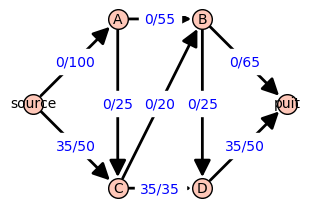

flot augmente de 15 sur [('source', 'C'), ('C', 'B'), ('B', 'puit')] : flot actuel 50


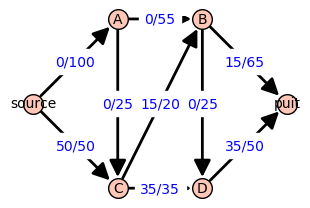

flot augmente de 50 sur [('source', 'A'), ('A', 'B'), ('B', 'puit')] : flot actuel 100


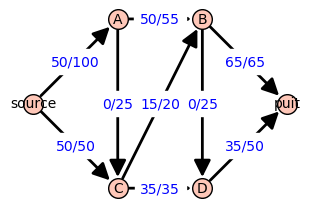

flot augmente de 5 sur [('source', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'puit')] : flot actuel 105


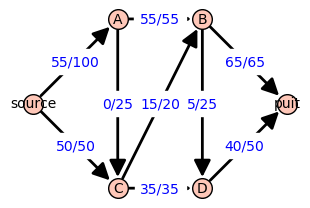

flot augmente de 5 sur [('source', 'A'), ('A', 'C'), ('C', 'B'), ('B', 'D'), ('D', 'puit')] : flot actuel 110


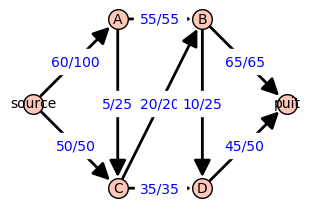

Le flot maximale est 110


In [11]:
# exemple de 
# https://www.researchgate.net/publication/330100794_Application_of_Ford-Fulkerson_Algorithm_to_Maximum_Flow_in_Water_Distribution_Pipeline_Network 
township = DiGraph()
township.add_vertices("ACBD")
township.add_vertex("source")
township.add_vertex("puit")
township.add_edges([
    ('source', 'A', "0/100"),
    ('source', 'C', "0/50"),
    
    ('A', 'C', "0/25"),
    ('A', 'B', "0/55"),
    
    ('C', 'B', "0/20"),
    ('C', 'D', "0/35"),
    
    ('B', 'D',  "0/25"),
    ('B', 'puit',  "0/65"),
    
    ('D', 'puit',  "0/50")
])
org_township = {
    'source' : [0, 0], 'A' : [1, 1], 'C' : [1, -1],
    'B': [2, 1], 'D': [2, -1], 'puit':[3, 0]
}

source = township.sources()[0]
puit= township.sinks()[0]

ff(township, org_township)